# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# mu = mean , sigma = standard deviation
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/cecil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (2.5350194424961536, 0.28153184230925005)
1    (0.06859631550626508, 0.9662833568083313)
2    (3.8157620011374416, 0.14839450153759823)
3     (0.7198921989661498, 0.6977139321991386)
4    (0.04487120373346567, 0.9778142045752805)
dtype: object

#### Interpret the normaltest results and make your observations.

first one: the sample space is not enough robust to run a reliable normal test 
(error message: kurtosistest only valid for n>=20). For n<= 100 it would be more suitable to use the Shapiro-Wilk test.

In [3]:
# setting the parameters for Shapiro-Wilk test with small space sample:
data = np.random.normal(50,5,10)
stat, p = shapiro(data)

# interpreting the Shapiro-Wilk test:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


* for the other ones: the test return 2 values: 1) Statistic and 2) p-value.
The tests assume that that the sample has a Gaussian distribution: this is called the null hypothesis, or H0. 
A threshold level is chosen called alpha, typically 5% (or 0.05), which is used to interpret the p-value
    - if p <= alpha: we could reject H0 and say the distribution is not normal.
    - if p > alpha: we fail to reject H0, this mean the distribution should be normal.

     --> So, in all the other sample spaces, we can say the null hipotesis cannot be rejected, 
    so a priori the distribution should be normal.
    but sometimes it's possible that p>0.05 and the data do not come from a normal population. 
    That's why it's better to plot before afirming 100% because the scipy normal test is focused on 
    curtosis and skewness and not for the whole distribution. 
    If the shape of the distribution does not look as Gauss type, 
    we can also set alpha as 1% (0,01) and run more stats test with the other suspected distributions to be 100% sure.

In [6]:
for d in dists:
    alpha = 0.05
    p = stats.normaltest(d)[1]
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/home/cecil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


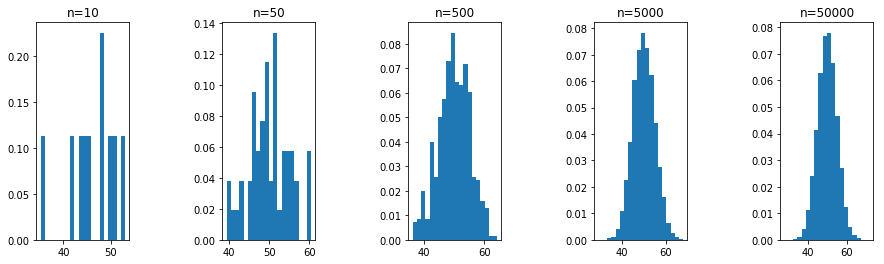

In [20]:
# let's plot the distibution:
# Your code here
f, ax = plt.subplots(1, 5)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 5):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

In [21]:
# Only after looking the shape of these distributions, we can conclude that yes, they are normal distributions.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

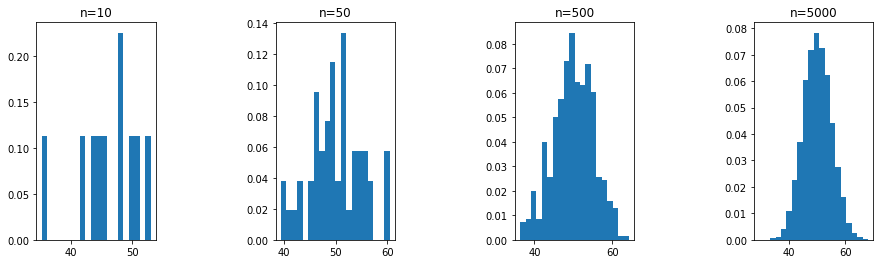

In [19]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

In [ ]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)